In [1]:
df='''date,device,user_id,purchased,sales,session_time,is_return
2025-01-01,pc,U001,1,52000,6.2,0
2025-01-01,mobile,U002,1,38000,3.1,0
2025-01-01,pc,U003,0,0,2.5,0
2025-01-01,mobile,U004,0,0,1.8,0
2025-01-02,pc,U001,1,54000,5.9,1
2025-01-02,mobile,U005,1,36000,3.4,0
2025-01-02,pc,U006,1,51000,4.7,0
2025-01-02,mobile,U007,0,0,2.2,0
2025-01-03,pc,U008,0,0,2.9,0
2025-01-03,mobile,U002,1,39000,3.6,1
2025-01-03,pc,U009,1,58000,6.5,0
2025-01-03,mobile,U010,1,41000,3.2,0
2025-01-04,pc,U001,1,60000,7.1,1
2025-01-04,mobile,U011,0,0,2.0,0
2025-01-04,pc,U012,0,0,3.1,0
2025-01-04,mobile,U013,1,35000,3.0,0
2025-01-05,pc,U014,1,53000,5.8,0
2025-01-05,mobile,U015,1,37000,3.3,0
2025-01-05,pc,U006,1,56000,6.0,1
2025-01-05,mobile,U002,0,0,2.1,0
2025-01-06,pc,U016,0,0,2.7,0
2025-01-06,mobile,U017,1,40000,3.5,0
2025-01-06,pc,U009,1,59000,6.8,1
2025-01-06,mobile,U018,0,0,1.9,0
2025-01-07,pc,U019,1,62000,7.3,0
2025-01-07,mobile,U020,1,42000,3.7,0
'''

In [2]:
# =========================
# 기본 데이터 처리
# =========================
import pandas as pd
import numpy as np

# =========================
# CSV 문자열 처리 (StringIO)
# =========================
from io import StringIO

# =========================
# 시각화
# =========================
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# 시각화 기본 설정 (한글 + 스타일)
# =========================
sns.set_style('whitegrid')
plt.rc('font', family='Malgun Gothic')   # 윈도우 기준
plt.rc('axes', unicode_minus=False)


In [3]:
df1=pd.read_csv(StringIO(df))

In [4]:
df1

,date,device,user_id,purchased,sales,session_time,is_return
0,2025-01-01,pc,U001,1,52000,6.2,0
1,2025-01-01,mobile,U002,1,38000,3.1,0
2,2025-01-01,pc,U003,0,0,2.5,0
3,2025-01-01,mobile,U004,0,0,1.8,0
4,2025-01-02,pc,U001,1,54000,5.9,1
5,2025-01-02,mobile,U005,1,36000,3.4,0
6,2025-01-02,pc,U006,1,51000,4.7,0
7,2025-01-02,mobile,U007,0,0,2.2,0
8,2025-01-03,pc,U008,0,0,2.9,0
9,2025-01-03,mobile,U002,1,39000,3.6,1


In [5]:
#이 파일 하나로 👇 전부 가능

#✔ 기기별 방문자 수 / 구매자 수

#✔ 전환율 계산

#✔ 객단가 / 총매출 비교

#✔ 체류시간 vs 재구매율 분석

#✔ 단순 LTV 계산

#✔ “모바일 전환율 높지만 PC가 더 중요한 이유” 증명

In [ ]:
df1

In [13]:
df2=df1.groupby('device').agg(방문자수=('user_id','count'),
                         구매자수=('purchased','sum'),
                        총매출 =('sales','sum'),
                        재구매자=('is_return','sum'),
                         평균체류시간=('session_time','mean'))

In [15]:
df2['객단가']=df2['총매출']/df2['방문자수']

In [21]:
df2['객단가']=df2['객단가'].astype(int)

In [22]:
df2

,방문자수,구매자수,총매출,재구매자,평균체류시간,객단가
device,,,,,,
mobile,13,8,308000,1,2.830769,23692
pc,13,9,505000,4,5.192308,38846


In [23]:
df2['전환율']=df2['구매자수']/df2['방문자수']

In [29]:
df2=df2.reset_index()

In [26]:
df2['전환율']=df2['전환율'].round(2)

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

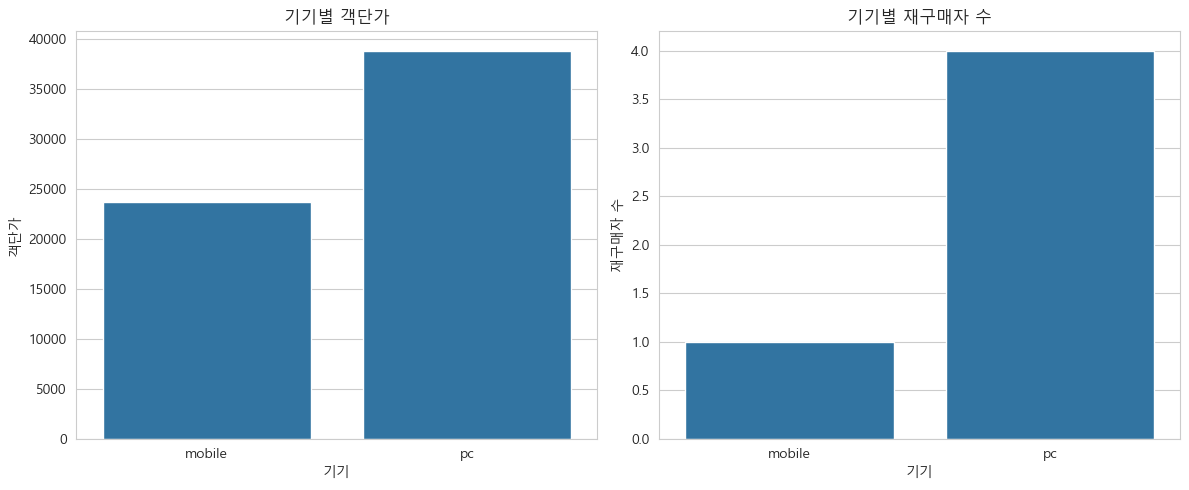

In [46]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))

#기기별 객단가
sns.barplot(
data=df2,
x='device',
y='객단가',
ax=ax1)

ax1.set_title('기기별 객단가')
ax1.set_xlabel('기기')
ax1.set_ylabel('객단가')

#기기별 평균 재구매자수

sns.barplot(
data=df2,
x='device',
y='재구매자',
ax=ax2)

ax2.set_title('기기별 재구매자 수')
ax2.set_xlabel('기기')
ax2.set_ylabel('재구매자 수')

plt.tight_layout()
plt.show()


#체류시간별

<Axes: xlabel='평균체류시간', ylabel='재구매자'>

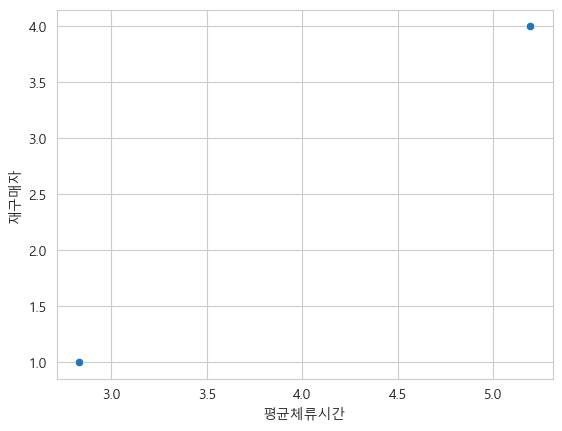

In [52]:
sns.scatterplot(data=df2,x='평균체류시간',y='재구매자')

In [47]:
df2

,device,방문자수,구매자수,총매출,재구매자,평균체류시간,객단가,전환율
0,mobile,13,8,308000,1,2.830769,23692,0.62
1,pc,13,9,505000,4,5.192308,38846,0.69


In [56]:
df1.groupby('device')[['session_time','is_return']].corr()

session_time  is_return
device                                      
mobile session_time      1.000000   0.323437
       is_return         0.323437   1.000000
pc     session_time      1.000000   0.488814
       is_return         0.488814   1.000000

<Axes: xlabel='session_time', ylabel='is_return'>

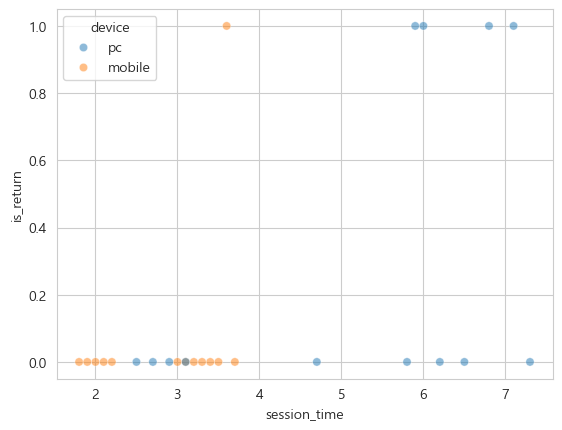

In [58]:
sns.scatterplot(
    data=df1,
    x='session_time',
    y='is_return',
    hue='device',
    alpha=0.5
)
